<a href="https://colab.research.google.com/github/zzzzzssyy/ECON3916-33674-Statistical-Machine-Learning/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Spotify', 'Price_2016': 9.99, 'Price_2024': 10.99},
]

In [12]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify: 10.01% Inflation


In [6]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='5a0296a6815bd31136bd858db078ee86')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
streaming = fred.get_series('CUSR0000SERA02')
food = fred.get_series('CUSR0000SEFV')

In [7]:
import pandas as pd

df_fred = pd.DataFrame({
    'CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Streaming': streaming,
    'Food': food
})

base_date = '2016-01-01'
base_values = df_fred.loc[base_date]
df_fred_normalized = (df_fred / base_values) * 100
df_normalized = df_fred[df_fred_normalized.index >= base_date]

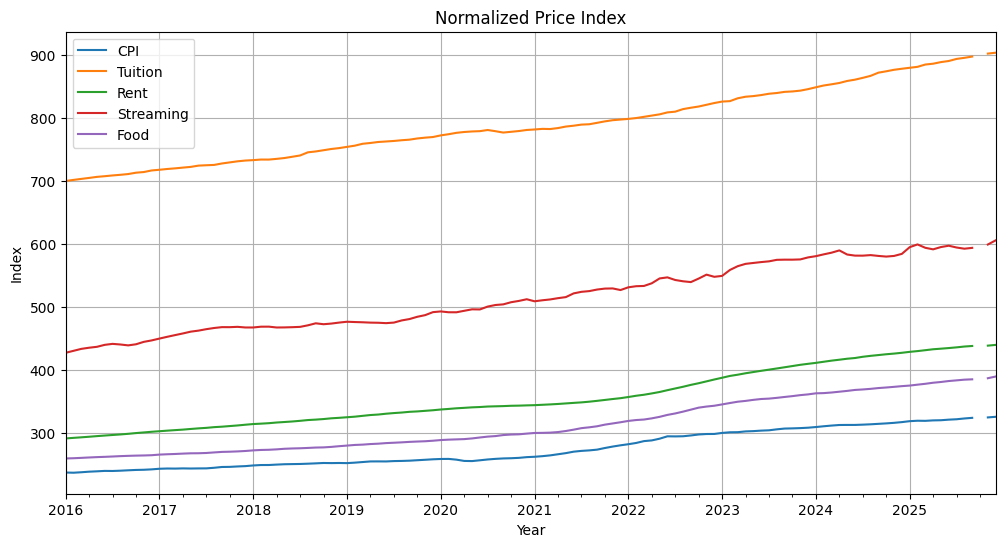

In [8]:
import matplotlib.pyplot as plt

df_normalized.plot(figsize=(12, 6))
plt.title('Normalized Price Index')
plt.ylabel('Index')
plt.xlabel('Year')
plt.grid(True)
plt.show()

/tmp/ipython-input-2147282393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized['Student_SPI'] = (


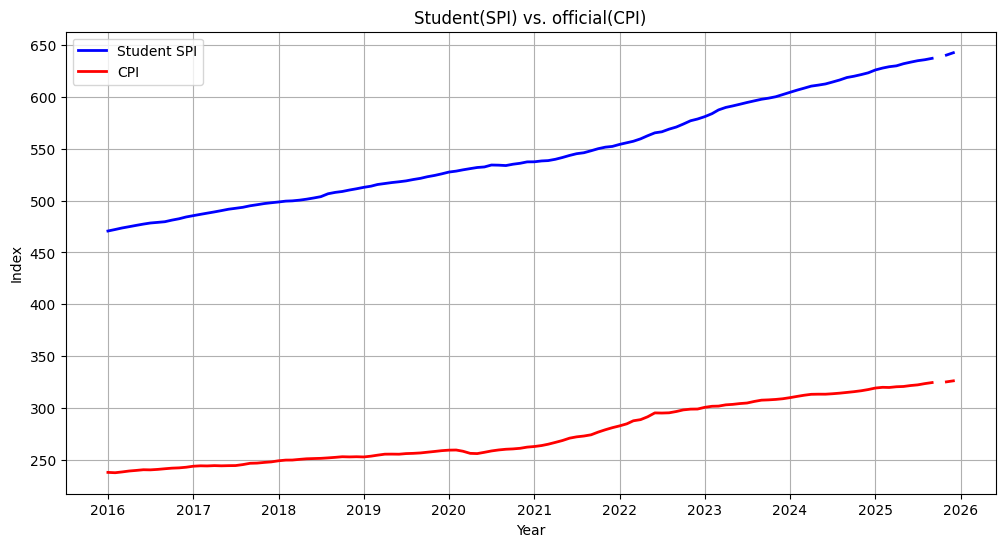

Student inflation: 542.73%
Official CPI: 226.03%
Gap: 316.70%


In [11]:
df_normalized['Student_SPI'] = (
    df_normalized['Tuition'] * 0.4 +
    df_normalized['Rent'] * 0.3 +
    df_normalized['Streaming'] * 0.15 +
    df_normalized['Food'] * 0.15
)

plt.figure(figsize=(12, 6))
plt.plot(df_normalized['Student_SPI'], label='Student SPI', linewidth=2, color='blue')
plt.plot(df_normalized['CPI'], label='CPI', linewidth=2, color='red')
plt.title('Student(SPI) vs. official(CPI)')
plt.ylabel('Index')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.show()

student_growth = df_normalized['Student_SPI'].iloc[-1] - 100
cpi_growth = df_normalized['CPI'].iloc[-1] - 100
gap = student_growth - cpi_growth

print(f"Student inflation: {student_growth:.2f}%")
print(f"Official CPI: {cpi_growth:.2f}%")
print(f"Gap: {gap:.2f}%")

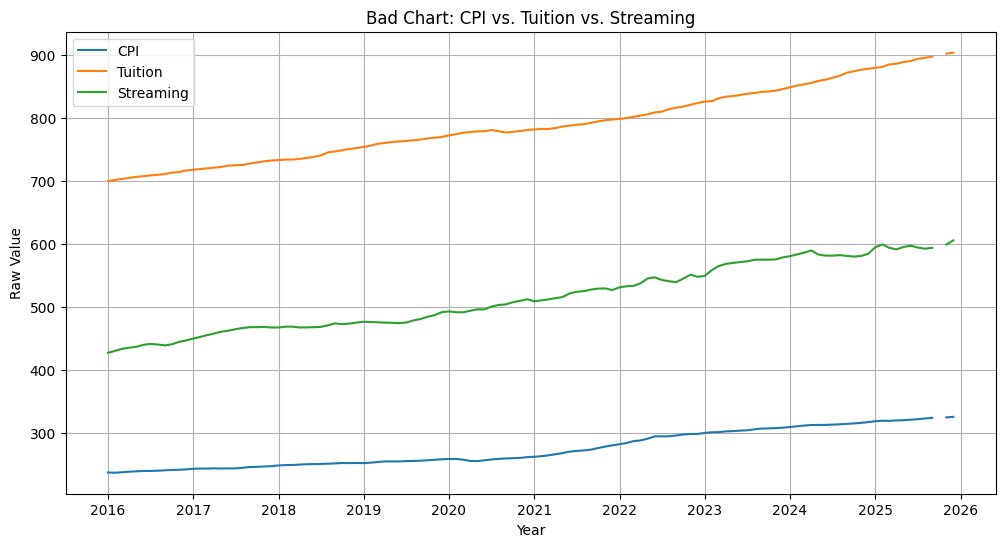

In the chat, we can see tuition looks huge, and streaming looks tiny.
The reason is they have different base, so we should normalize tto the same starting point！


In [15]:
df_raw = pd.DataFrame({
  'CPI': official_cpi,
  'Tuition': tuition,
  'streaming': streaming
})

df_raw_2016 = df_raw[df_raw.index >= '2016-01-01']

plt.figure(figsize=(12, 6))
plt.plot(df_raw_2016['CPI'], label='CPI')
plt.plot(df_raw_2016['Tuition'], label='Tuition')
plt.plot(df_raw_2016['streaming'], label='Streaming')
plt.title('Bad Chart: CPI vs. Tuition vs. Streaming')
plt.ylabel('Raw Value')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

print("In the chat, we can see tuition looks huge, and streaming looks tiny.")
print("The reason is they have different base, so we should normalize tto the same starting point！")

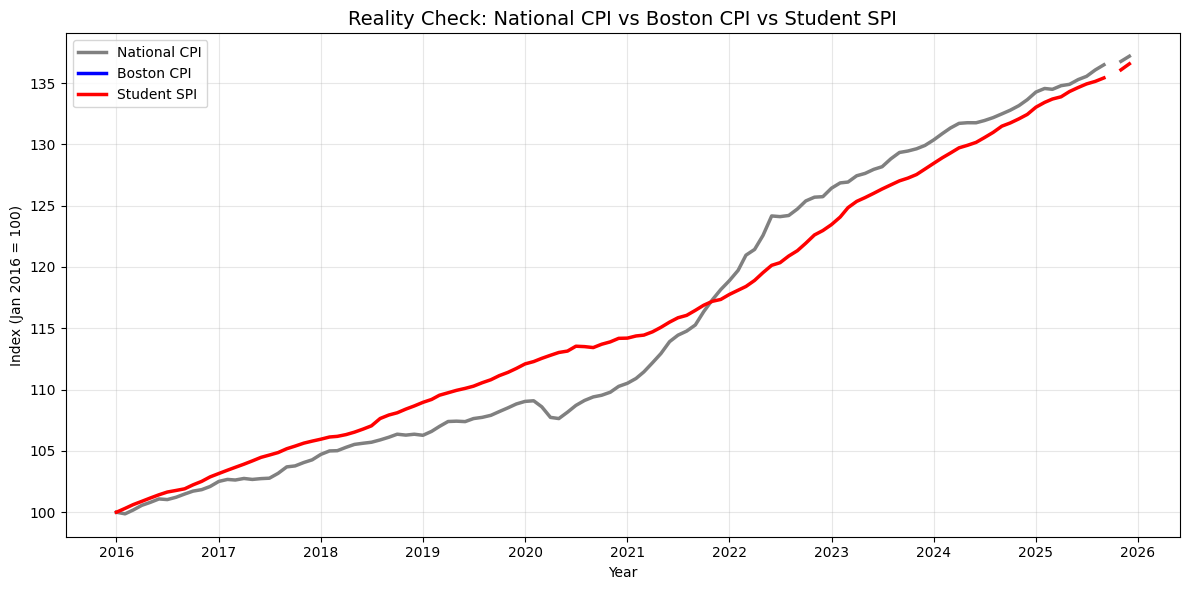

Growth Rate Comparison (2016-Now):
  National CPI Growth: 37.19%
  Boston CPI Growth: nan%
  Student SPI Growth: 36.57%

Gap Analysis:
  Boston vs National: nan percentage points
  Student vs Boston: nan percentage points
  Student vs National: -0.62 percentage points


In [17]:
# Task 4.1: Fetch Boston CPI and compare

# 1. Fetch Boston-Cambridge-Newton CPI from FRED
boston_cpi = fred.get_series('CUUSA103SA0')  # Boston area CPI

# 2. Create DataFrame with three series
df_comparison = pd.DataFrame({
    'National_CPI': official_cpi,
    'Boston_CPI': boston_cpi,
    'Student_SPI': df_normalized['Student_SPI']
})

# 3. Normalize to January 2016 = 100
base_date = '2016-01-01'
df_comparison = df_comparison[df_comparison.index >= base_date]
base_values = df_comparison.loc[base_date]
df_comparison_normalized = (df_comparison / base_values) * 100

# 4. Plot three lines for comparison
plt.figure(figsize=(12, 6))
plt.plot(df_comparison_normalized['National_CPI'],
         label='National CPI', linewidth=2.5, color='gray')
plt.plot(df_comparison_normalized['Boston_CPI'],
         label='Boston CPI', linewidth=2.5, color='blue')
plt.plot(df_comparison_normalized['Student_SPI'],
         label='Student SPI', linewidth=2.5, color='red')

plt.title('Reality Check: National CPI vs Boston CPI vs Student SPI', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Index (Jan 2016 = 100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Analyze results
print("Growth Rate Comparison (2016-Now):")
latest = df_comparison_normalized.iloc[-1]
print(f"  National CPI Growth: {latest['National_CPI'] - 100:.2f}%")
print(f"  Boston CPI Growth: {latest['Boston_CPI'] - 100:.2f}%")
print(f"  Student SPI Growth: {latest['Student_SPI'] - 100:.2f}%")

# Calculate gaps
boston_vs_national = latest['Boston_CPI'] - latest['National_CPI']
student_vs_boston = latest['Student_SPI'] - latest['Boston_CPI']
student_vs_national = latest['Student_SPI'] - latest['National_CPI']

print(f"\nGap Analysis:")
print(f"  Boston vs National: {boston_vs_national:.2f} percentage points")
print(f"  Student vs Boston: {student_vs_boston:.2f} percentage points")
print(f"  Student vs National: {student_vs_national:.2f} percentage points")
